# Asgn1
## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
## Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
# df = pd.read_csv("uber.csv")
df =  pd.read_csv('uber.csv')
df.head(7)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5


In [57]:
# custom dframe
# dl={'keys':['B','C','B','B','D'],'Gender':['M','F','M','F','M']}
# dl=pd.DataFrame(dl)
# dl
df.describe() 
#count of non null
#mean ,std dev
#q1 25% values lie below
#median
#q3 75%value slie below this
#min n max value of col

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [58]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [59]:
df.shape

(200000, 9)

In [60]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [61]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)

### NULL CHECK

In [62]:
numeric_col = df.select_dtypes(include=np.number).columns.tolist()
# df[numeric_col]=df[numeric_col].fillna(df[numeric_col].mean())
df=df.bfill()
df=df.ffill()
df.isna().sum()
# To remove the null values we use this
# df.interpolate(inplace=True)

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [63]:
v=df['fare_amount'].unique() # unique values present in column
print(v)
print("length ",v.size)

[ 7.5   7.7  12.9  ... 37.2  86.25 89.1 ]
length  1244


### Rename Column

In [64]:
#rename a column
df.rename(columns={'fare_amount':'fareAmount'},inplace = True)  #note syntax :
# df['New_Edu']=df['Education']
# df.drop(['Education'],axis=1,inplace=True)
df

,fareAmount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


## Part 2 OUTLINERS
OUTLINERS CHECK AND TECHNIQUES TO DEAL WITH THEM

Outliners are those data points that are distant from all other observations and lie outside all other distribution

1. First way to do is Z-score (x-U/σ) method, there u is the central value, all values that lie after 3rd deviation are considered as outliners

2. IQR - inter quartile range all values after 1.5 times of interquartile range ie above 3rd and below 1

3. box plot

4. Using scatter points

1-Z-score detection
z=(dataPoint - mean /std-deviation)

array([[<Axes: title={'center': 'fareAmount'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>],
       [<Axes: title={'center': 'dropoff_latitude'}>,
        <Axes: title={'center': 'passenger_count'}>]], dtype=object)

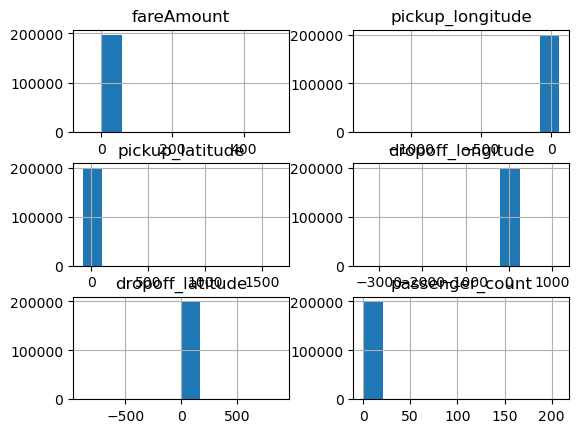

In [65]:
df.hist()

In [66]:
# z = np.abs(stats.zscore(df['pickup_longitude']))
# z

In [67]:
# #Outliner detection  
# arr = np.where(z>3)[0]  
# # arr has only the indices where it has z>3 in a list form
# print(arr)
# print("total outliners in it ",len(arr))
# res=df.iloc[arr]
# res

In [68]:
# # remove outliners by below command
# df_no_outliers = df[(z <= 3)] #for a new column
# # df=df[z<=3] # changes in same column
# df_no_outliers

## IQR inter quartile range
the concepts of Q1 (the first quartile), Q3 (the third quartile), and the Interquartile Range (IQR) work:

Quartiles (Q1, Q3):

1. Q1 (First Quartile): It is the median of the lower half of the dataset. It represents the value below which 25% of the data falls.
2. Q3 (Third Quartile): It is the median of the upper half of the dataset. It represents the value below which 75% of the data falls.
### Interquartile Range (IQR):
1. The IQR is a measure of statistical dispersion, or in simple terms, it's the range in which the middle 50% of the data values lie.
2. Mathematically, IQR is calculated as the difference between Q3 and Q1: IQR = Q3 - Q1.
3. The IQR is used in detecting outliers. According to the IQR rule, values outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR are considered potential outliers.

In [69]:
# IQR 
# Calculate the first quartile (Q1) and third quartile (Q3) for 'fare_amount'
Q1 = df['fareAmount'].quantile(0.25)
Q3 = np.percentile(df['fareAmount'], 75, interpolation='midpoint')

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 6.0
Q3: 12.5
IQR: 6.5


<Axes: ylabel='Frequency'>

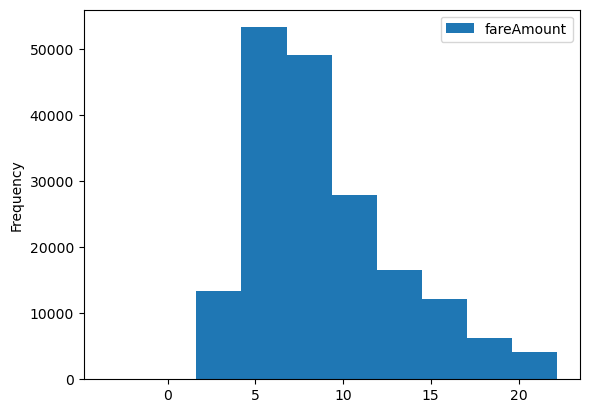

In [70]:
# # Above Upper bound
# upper = df['pickup_longitude'] >= (Q3+1.5*IQR)
 
# print("Upper bound:",Q3+1.5*IQR)
# print(np.where(upper))
 
# # Below Lower bound
# lower = df['pickup_longitude'] <= (Q1-1.5*IQR)
# print("Lower bound:", Q1-1.5*IQR)
# print(np.where(lower))
# # These are the outliers combining Upper Bounded Array and Lowe Bounded Array
# Remove outliers using IQR
df_new = df[(df['fareAmount'] <= (Q3+1.5*IQR)) & (df['fareAmount'] >= (Q1-1.5*IQR))]
df_new.plot(kind='hist', y='fareAmount')  # Almost normal

<Axes: >

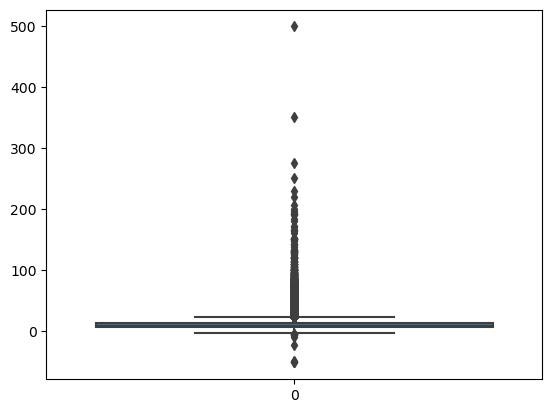

In [71]:
sns.boxplot(df['fareAmount'])

<Axes: >

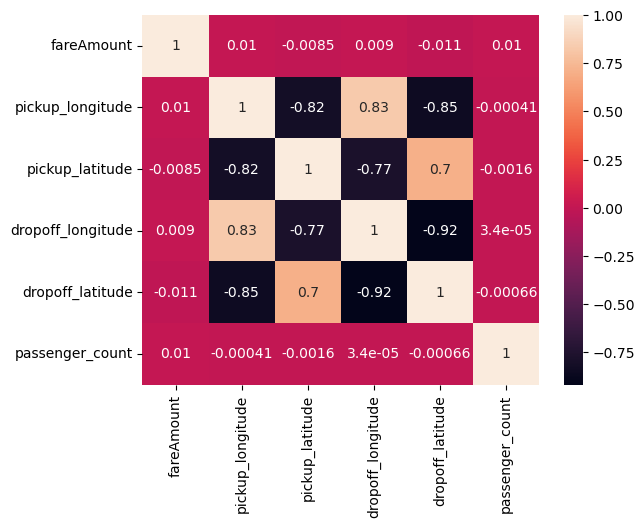

In [72]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## train test split

In [73]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(['fareAmount'], axis=1)
y = df['fareAmount']

X_train, x_test, y_train, y_test = train_test_split(X, y)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)
#You want RMSE to be as low as possible, ideally close to zero.
# An R² score close to 1 means the model explains most of the variance in the target variable (e.g., fareAmount). 
# Conversely, an R² score near 0 or negative indicates a poor fit.

RMSE ->  9.707925707961492
R2 ->  -4.1053101947241544e-05


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  4.741668963663677
R2 ->  0.7614236434262897
